In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [8]:
train.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


In [9]:
test.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


## EDA - 데이터 시각화

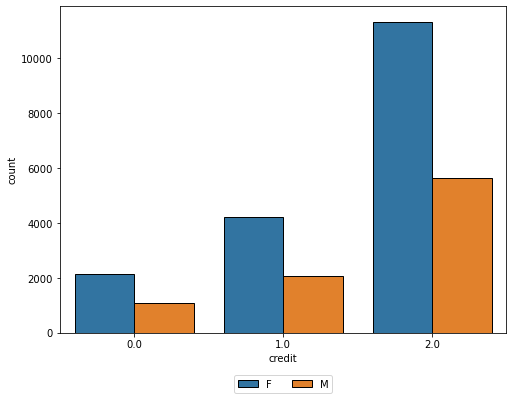

In [10]:
plt.figure(figsize = (8, 6))
sns.countplot(train['credit'], hue = train['gender'], edgecolor = (0, 0, 0))
plt.legend(loc = 'lower center', bbox_to_anchor = (.5, -.2), ncol = 2)
plt.show()

모든 성별에서 2 클래스 비중이 높은 것을 알 수 있습니다.

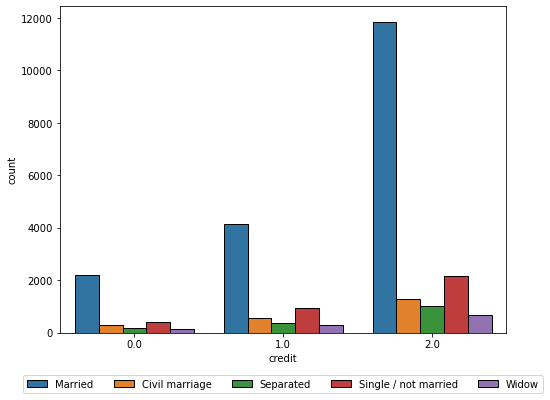

In [11]:
plt.figure(figsize = (8, 6))
sns.countplot(train['credit'], hue = train['family_type'], edgecolor = (0, 0, 0))
plt.legend(loc = 'lower center', bbox_to_anchor = (.5, -.2), ncol = 5)
plt.show()

"Married" 고객이 비중이 가장 높았고 "Single / not married" 고객이 그 다음으로 높은 것을 알 수 있습니다.

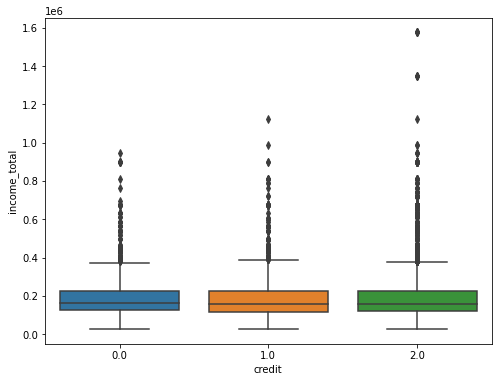

In [12]:
plt.figure(figsize = (8, 6))
sns.boxplot(train['credit'], train['income_total'])
plt.show()

각 credit 등급에 따른 income_total의 박스 플롯 결과 2 credit의 고객의 소득이 높은 편임을 알 수 있습니다.

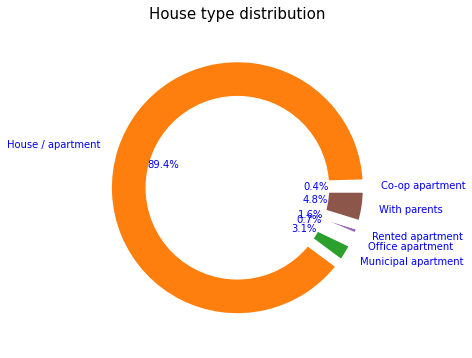

In [13]:
plt.figure(figsize = (10, 6))
ft = train.groupby('house_type').count()['index']
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(ft,labels = ft.index, wedgeprops = {'linewidth' : 10, 'edgecolor' : 'white'}, autopct = '%1.1f%%', textprops = {'color' : "b", 'fontsize' : 10})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('House type distribution', color = 'black', size = 15)
plt.show()

주택 타입 분포를 살펴보면 자가/아파트 비중이 가장 높은 것을 알 수 있습니다.

In [14]:
train['DAYS_BIRTH'] = np.abs(train['DAYS_BIRTH'])
test['DAYS_BIRTH'] = np.abs(test['DAYS_BIRTH'])

train['AGE'] = train['DAYS_BIRTH'] / 365
test['AGE'] = test['DAYS_BIRTH'] / 365

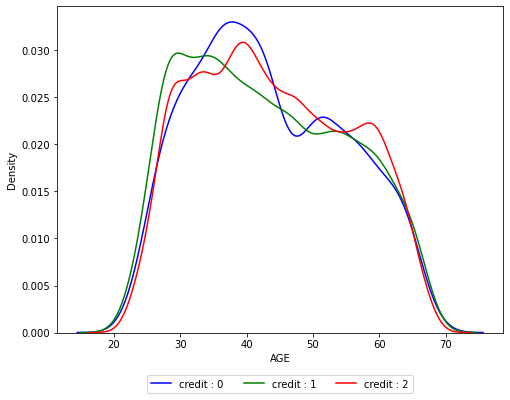

In [15]:
plt.figure(figsize = (8, 6))
sns.distplot(train[train.credit == 0]['AGE'], color = 'b', hist = False, label = 'credit : 0')
sns.distplot(train[train.credit == 1]['AGE'], color = 'g', hist = False, label = 'credit : 1')
sns.distplot(train[train.credit == 2]['AGE'], color = 'r', hist = False, label = 'credit : 2')
plt.legend(loc = 'lower center', bbox_to_anchor = (.5, -.2), ncol = 3)
plt.show()

## Feature Engineering - 변수 선정 & 전처리

- 불필요한 컬럼 삭제
- 결측치를 NA로 대체
- 일수와 관련된 feature를 음수를 양수로 변환
- 일수에서 연수를 추출

In [16]:
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [17]:
train.fillna('NA', inplace = True)
test.fillna('NA', inplace = True)

In [18]:
train['DAYS_EMPLOYED'] = [0 if x >= 0 else x for x in train['DAYS_EMPLOYED']]
test['DAYS_EMPLOYED'] = [0 if x >= 0 else x for x in test['DAYS_EMPLOYED']]

In [19]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    train[feat]=np.abs(train[feat])
    test[feat]=np.abs(test[feat])

In [20]:
train['gap_b_e'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']
test['gap_b_e'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']

In [21]:
train['E_YEAR'] = train['DAYS_EMPLOYED'] // 365
test['E_YEAR'] = test['DAYS_EMPLOYED'] // 365

In [22]:
train['mean_income'] = train['income_total'] / (train['DAYS_BIRTH'] + train['DAYS_EMPLOYED'])
test['mean_income'] = test['income_total'] / (test['DAYS_BIRTH'] + test['DAYS_EMPLOYED'])

In [23]:
train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'] == 'NA'), 'occyp_type'] = 'NO_WORK'
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'] == 'NA'), 'occyp_type'] = 'NO_WORK'

## Modeling

- 데이터 분석 기법 : 분류(Classification)

#### 더 많은 학습 데이터를 사용하기 위해 중복 데이터는 처리하지 않았습니다.

종속변수는 credit, 독립변수는 credit을 제외한 나머지로 따로 지정합니다.

In [56]:
X = train.drop('credit', axis = 1)
y = train['credit']

In [57]:
target = test.copy()

Catboost 알고리즘은 범주형 변수를 따로 처리할 수 있기 때문에 cat_cols에 범주형 변수인 feature이름을 저장합니다.

In [58]:
cat_cols = [c for c in X.columns if X[c].dtype == 'object']

In [59]:
cat_cols

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

- 정확도 향상 기법 : StratifiedKFold로 앙상블을 통해 Overfitting 방지

In [29]:
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

### 사용 Model : 트리 계열 보다 앙상블 방식을 사용한 부스팅 계열 알고리즘 사용
- Catboost
- XGBoost
- Lightgbm

In [184]:
cb_pred = np.zeros((target.shape[0], 3))
for tr_idx, val_idx in skf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cb = CatBoostClassifier(random_state = 42, n_estimators = 5000, max_depth = 5, learning_rate = .05, bootstrap_type = 'Bernoulli')
    
    cb.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], early_stopping_rounds = 100, cat_features = cat_cols, verbose = 1000)
    
    pred = cb.predict_proba(target) / 10
    
    cb_pred += pred

0:	learn: 1.0698975	test: 1.0698975	test1: 1.0693063	best: 1.0693063 (0)	total: 29.8ms	remaining: 2m 28s
1000:	learn: 0.7258235	test: 0.7350674	test1: 0.7620967	best: 0.7620967 (1000)	total: 21.3s	remaining: 1m 24s
2000:	learn: 0.6673077	test: 0.6859511	test1: 0.7439207	best: 0.7439040 (1998)	total: 43.1s	remaining: 1m 4s
3000:	learn: 0.6200860	test: 0.6471109	test1: 0.7320525	best: 0.7320525 (3000)	total: 1m 4s	remaining: 42.9s
4000:	learn: 0.5804770	test: 0.6149326	test1: 0.7244479	best: 0.7244479 (4000)	total: 1m 26s	remaining: 21.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7226842801
bestIteration = 4362

Shrink model to first 4363 iterations.
0:	learn: 1.0697270	test: 1.0697270	test1: 1.0700545	best: 1.0700545 (0)	total: 23.1ms	remaining: 1m 55s
1000:	learn: 0.7226030	test: 0.7311295	test1: 0.7792871	best: 0.7792331 (990)	total: 21.3s	remaining: 1m 25s
2000:	learn: 0.6631011	test: 0.6814194	test1: 0.7609244	best: 0.7609009 (1998)	total: 42.9s	remaining:

Lightgbm, XGBoost는 변수가 모두 숫자여야 하기 때문에 Catboost와 달리 모든 범주형, 문자형 변수를 숫자로 변환합니다.

In [32]:
X['gender'] = [1 if x == 'F' else 0 for x in X['gender']]
X['car'] = [1 if x == 'F' else 0 for x in X['car']]
X['reality'] = [1 if x == 'F' else 0 for x in X['reality']]

In [33]:
target['gender'] = [1 if x == 'F' else 0 for x in target['gender']]
target['car'] = [1 if x == 'F' else 0 for x in target['car']]
target['reality'] = [1 if x == 'F' else 0 for x in target['reality']]

종류가 많은 범주형 변수에 대해 원-핫 인코딩을 취해줍니다.

In [62]:
X = pd.get_dummies(columns = X.columns[X.dtypes == object].tolist(), data = X)

In [63]:
target = pd.get_dummies(columns = target.columns[target.dtypes == object].tolist(), data = target)

In [64]:
X.shape, target.shape

((26457, 60), (10000, 60))

In [65]:
xgb_pred = np.zeros((target.shape[0], 3))
for tr_idx, val_idx in skf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb = CatBoostClassifier(random_state = 42, n_estimators = 5000, max_depth = 5, learning_rate = .05)
    
    xgb.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], early_stopping_rounds = 100, verbose = 1000)
    
    pred = xgb.predict_proba(target) / 10
    
    xgb_pred += pred

0:	learn: 1.0698981	test: 1.0698981	test1: 1.0692561	best: 1.0692561 (0)	total: 66.1ms	remaining: 5m 30s
1000:	learn: 0.7076008	test: 0.7076008	test1: 0.7521137	best: 0.7521137 (1000)	total: 7.55s	remaining: 30.2s
2000:	learn: 0.6476568	test: 0.6476568	test1: 0.7343707	best: 0.7343392 (1999)	total: 15.5s	remaining: 23.3s
3000:	learn: 0.6035682	test: 0.6035682	test1: 0.7251736	best: 0.7251561 (2998)	total: 23.5s	remaining: 15.6s
4000:	learn: 0.5698217	test: 0.5698217	test1: 0.7188019	best: 0.7187307 (3986)	total: 31.3s	remaining: 7.83s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7178487644
bestIteration = 4234

Shrink model to first 4235 iterations.
0:	learn: 1.0697463	test: 1.0697463	test1: 1.0699854	best: 1.0699854 (0)	total: 6.79ms	remaining: 34s
1000:	learn: 0.7046517	test: 0.7046517	test1: 0.7723523	best: 0.7723390 (999)	total: 7.37s	remaining: 29.5s
2000:	learn: 0.6445544	test: 0.6445544	test1: 0.7543455	best: 0.7543455 (2000)	total: 15.7s	remaining: 23.5s

In [66]:
lgbm_pred = np.zeros((target.shape[0], 3))
for tr_idx, val_idx in skf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm = CatBoostClassifier(random_state = 42, n_estimators = 5000, max_depth = 5, learning_rate = .05)
    
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], early_stopping_rounds = 100, verbose = 1000)
    
    pred = lgbm.predict_proba(target) / 10
    
    lgbm_pred += pred

0:	learn: 1.0698981	test: 1.0698981	test1: 1.0692561	best: 1.0692561 (0)	total: 7.8ms	remaining: 39s
1000:	learn: 0.7076008	test: 0.7076008	test1: 0.7521137	best: 0.7521137 (1000)	total: 7.56s	remaining: 30.2s
2000:	learn: 0.6476568	test: 0.6476568	test1: 0.7343707	best: 0.7343392 (1999)	total: 15.3s	remaining: 23s
3000:	learn: 0.6035682	test: 0.6035682	test1: 0.7251736	best: 0.7251561 (2998)	total: 23s	remaining: 15.3s
4000:	learn: 0.5698217	test: 0.5698217	test1: 0.7188019	best: 0.7187307 (3986)	total: 30.6s	remaining: 7.64s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7178487644
bestIteration = 4234

Shrink model to first 4235 iterations.
0:	learn: 1.0697463	test: 1.0697463	test1: 1.0699854	best: 1.0699854 (0)	total: 7.77ms	remaining: 38.8s
1000:	learn: 0.7046517	test: 0.7046517	test1: 0.7723523	best: 0.7723390 (999)	total: 8.12s	remaining: 32.4s
2000:	learn: 0.6445544	test: 0.6445544	test1: 0.7543455	best: 0.7543455 (2000)	total: 16.3s	remaining: 24.5s
3000: